# PLA with error plots

In [57]:
# For convenience, we define the line function here
def line(weights, x):
  return x * -weights[1]/weights[2] - weights[0]/weights[2]

range(-3, 9)


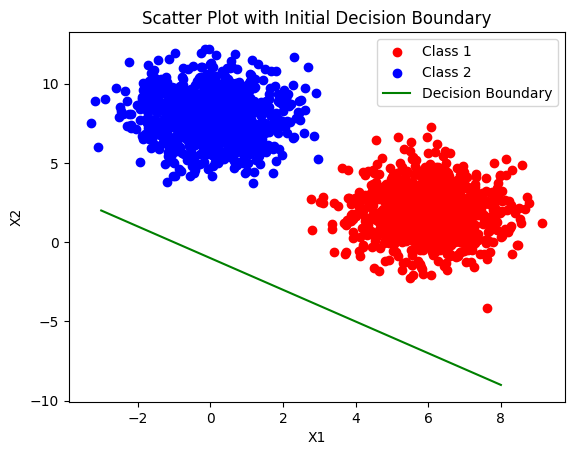

In [70]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(314)
N = 1000
X11 = np.random.normal(loc=6, scale=1, size=N)
X12 = np.random.normal(loc=2, scale=1.5, size=N)
y1 = np.ones(N)

X21 = np.random.normal(loc=0, scale=1, size=N)
X22 = np.random.normal(loc=8, scale=1.5, size=N)
y2 = -np.ones(N)

plt.scatter(X11, X12, c="r", label="Class 1")
plt.scatter(X21, X22, c="b", label="Class 2")

w = np.random.uniform(low=1, size=3)

plot_range = range(int(np.min(X1)),int(np.max(X1)))
plt.plot(
    plot_range,
    line(weights=w, x=plot_range),
    'g-',
    label = "Decision Boundary"
)


plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Scatter Plot with Initial Decision Boundary")

X0 = np.ones(N * 2)
X1 = np.concatenate((X11, X21))
X2 = np.concatenate((X21, X22))

X = np.stack((X0, X1, X2), axis=1)

y = np.concatenate((y1, y2))

### Error function

To keep track of the errors that occurred during the training phase, we can use the following error function:
$$
\frac{1}{2} \sum_{i=1}^{N} (y_i - X_i w_i)
$$

In [20]:
def sum_distance_error(X, y, w):
    return np.sum(np.square(y - np.dot(X, w)))/2
  
print(f"Current error: {sum_distance_error(X, y, w):.3f}")

Current error: 93090.497


### Training

Number of misclassifications: 0.0
[ 0.775       0.81686231 -0.61626531]


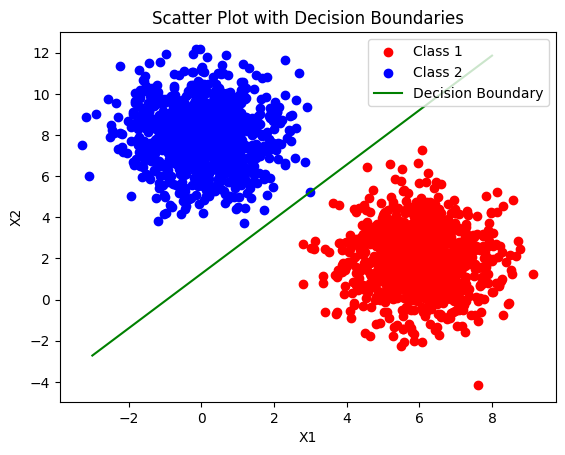

In [81]:
max_epochs = 100
current_epoch = 0
eta = 1e-3

distance_error_epoch = np.zeros(max_epochs)
misclassifications = np.zeros(max_epochs)

while current_epoch < max_epochs:
    distance_error_epoch[current_epoch] = sum_distance_error(X, y, w)
    misclassifications[current_epoch] = 0  # Reset misclassifications for current epoch
    for i in range(y.size):
        output = np.sign(np.dot(X[i, :], w))
        if (output * y[i]) < 0:
            w = w + eta * X[i, :] * y[i]
            misclassifications[current_epoch] += 1
    current_epoch += 1

print(f"Number of misclassifications: {np.sum(misclassifications)}")
print(w)


plt.scatter(X11, X12, c='r', label='Class 1')
plt.scatter(X21, X22, c='b', label='Class 2')


plot_range = range(int(np.min(X1)),int(np.max(X1)))
plt.plot(
    plot_range,
    line(weights=w, x=plot_range),
    'g-',
    label = "Decision Boundary"
)



# Show the plot with a legend
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot with Decision Boundaries')
plt.show()

### Error plots

By observing the two plots we can say that the model trainig has been successful. The error has been reduce to approximately 0.

misclassifications in the last 10 epochs: 0.0


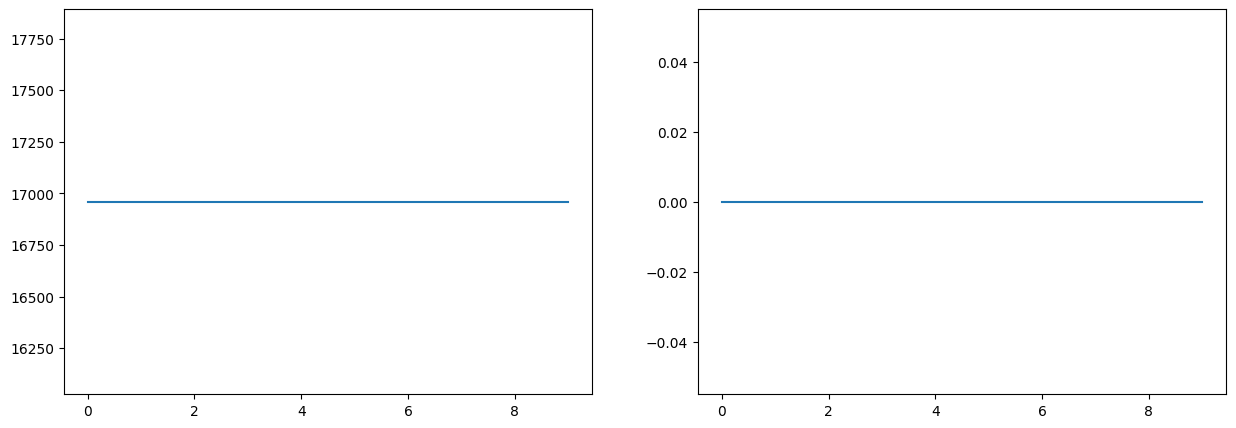

In [80]:
print(f"misclassifications in the last 10 epochs: {np.sum(misclassifications[-10:])}")

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(range(sum(distance_error_epoch > 0)), distance_error_epoch[distance_error_epoch > 0])
axs[1].plot(range(sum(distance_error_epoch > 0)), misclassifications[distance_error_epoch > 0])